In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [4]:
%%bash
echo $SHELL

/bin/bash


In [1]:
%%bash
python ./stylegan3/gen_images.py --outdir=out_256 --trunc=1 --seeds='13023-14140' --network="./inversion/stylegan3-encoder/pretrained/stylegan3-r-ffhqu-256x256.pkl"

Loading networks from "./inversion/stylegan3-encoder/pretrained/stylegan3-r-ffhqu-256x256.pkl"...
Generating image for seed 13023 (0/1118) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Generating image for seed 13024 (1/1118) ...
Generating image for seed 13025 (2/1118) ...
Generating image for seed 13026 (3/1118) ...
Generating image for seed 13027 (4/1118) ...
Generating image for seed 13028 (5/1118) ...
Generating image for seed 13029 (6/1118) ...
Generating image for seed 13030 (7/1118) ...
Generating image for seed 13031 (8/1118) ...
Generating image for seed 13032 (9/1118) ...
Generating image for seed 13033 (10/1118) ...
Generating image for seed 13034 (11/1118) ...
Generating image for seed 13035 (12/1118) ...
Generating image for seed 13036 (13/1118) ...
Generating image for seed 13037 (14/1118) ...
Generating image for seed 13038 (15/1118) ...
Generating image for seed 13039 (16/1118) ...
Generating image f

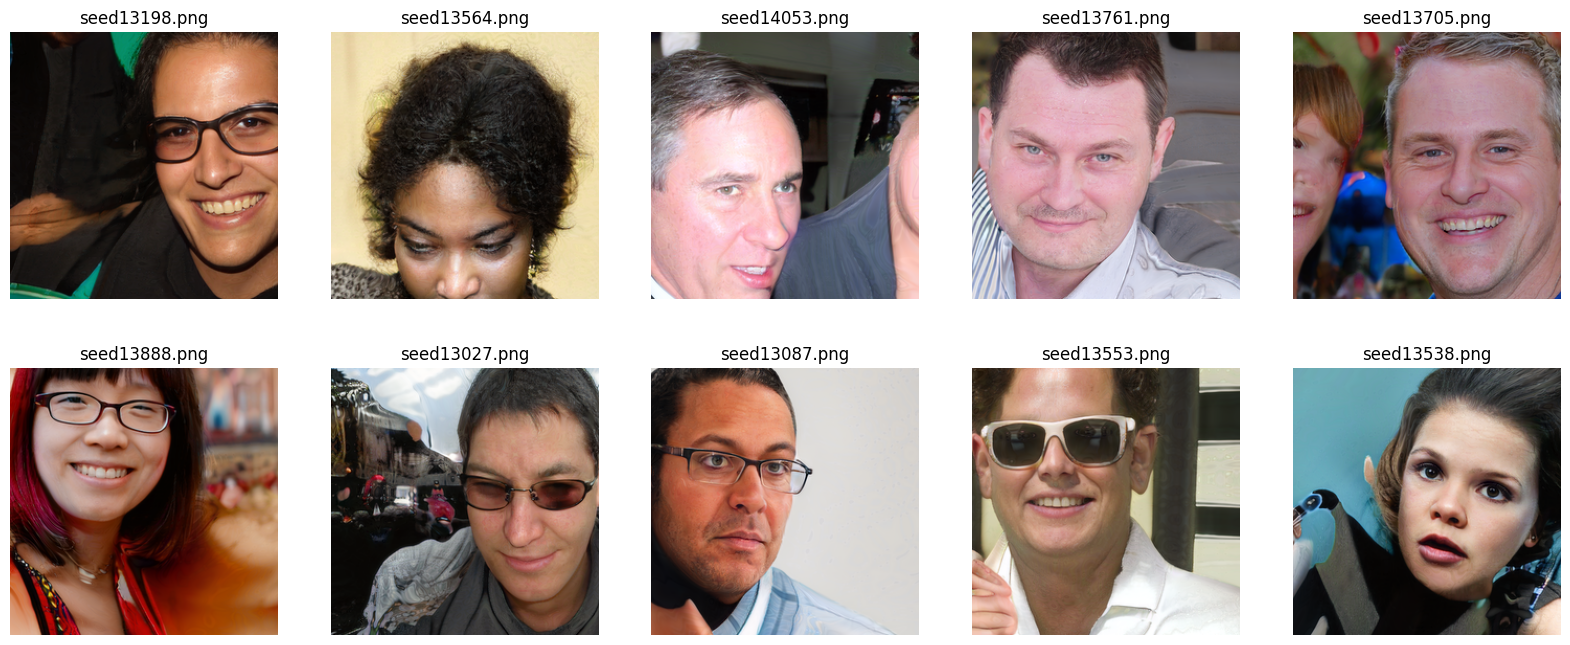

In [3]:
# visualize some images
import os
import matplotlib.pyplot as plt
import random
files = os.listdir('./out_256')
files = [os.path.join('./out_256', f) for f in files]
random.shuffle(files)
files = files[:10]
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(plt.imread(files[i]))
    ax.set_title(files[i].split('/')[-1])
    ax.axis('off')

## inversion test

Sample training code:

```bash
python train.py \
    --outdir exp/[exp_name] \
    --encoder [encoder_type] \
    --data data/[dataset_name] \
    --gpus [num_gpus] \
    --batch [total_batch_size] \
    --generator [generator_pkl]
```

In [3]:
%%bash
python inversion/stylegan3-encoder/train.py \
    --outdir inver_GazeCapture \
    --encoder base \
    --data /root/data/dataset_prep/GazeCapture/train \
    --valdata /root/data/dataset_prep/GazeCapture/test \
    --gpus 1 \
    --batch 12 \
    --generator ./inversion/stylegan3-encoder/pretrained/stylegan3-r-ffhqu-256x256.pkl \
    --print_steps 50 \
    --tb_steps 50 \
    --training_steps 100001 \
    --img_snshot_steps 100 \
    --net_snshot_steps 1000 \
    --val_steps 10000
   # --resume_pkl ./inver_256/00002-base-out_256-gpus1-batch10/network_snapshots/network-snapshot-005000.pkl


Training options:
{
  "model_architecture": "base",
  "dataset_dir": "/root/data/dataset_prep/GazeCapture/train",
  "num_gpus": 1,
  "batch_size": 12,
  "batch_gpu": 12,
  "generator_pkl": "./inversion/stylegan3-encoder/pretrained/stylegan3-r-ffhqu-256x256.pkl",
  "w_avg": false,
  "num_encoder_layers": 1,
  "val_dataset_dir": "/root/data/dataset_prep/GazeCapture/test",
  "training_steps": 1000,
  "val_steps": 100,
  "print_steps": 50,
  "tensorboard_steps": 50,
  "image_snapshot_steps": 100,
  "network_snapshot_steps": 2000,
  "learning_rate": 0.001,
  "l2_lambda": 1.0,
  "lpips_lambda": 0.8,
  "id_lambda": 0.1,
  "reg_lambda": 0.0,
  "gan_lambda": 0.0,
  "edit_lambda": 0.0,
  "random_seed": 0,
  "num_workers": 3,
  "resume_pkl": null,
  "run_dir": "inver_GazeCapture/00003-base-train-gpus1-batch12"
}

Creating output directory...
Launching processes...
Loading training set...

Num images:  50000
Image shape: torch.Size([3, 256, 256])

Constructing networks...
Initialize loss...


/home/user/micromamba/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/micromamba/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Initialize optimizer...
Initialize tensorboard logs...
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.

Current batch step: 0
{'id': 0.822932243347168,
 'id_improve': -0.8229322711316248,
 'l2': 1.687491774559021,
 'loss': 2.3799071311950684,
 'lpips': 0.762652575969696}
Saving image snapshot at step 0...
Saving netowrk snapshot at step 0...

Current batch step: 50
{'id': 0.8032273054122925,
 'id_improve': -0.8032272346317768,
 'l2': 0.5347334742546082,
 'loss': 1.1324996948242188,
 'lpips': 0.6468043923377991}

Current batch step: 100
{'id': 0.5859434604644775,
 'id_improve': -0.5859434182445208,
 'l2': 0.35308659076690674,
 'loss': 0.8863211870193481,
 'lpips': 0.5933002829551697}
Saving image snapshot at step 100...

Current batch step: 150
{'id': 0.5645254254341125,
 'id_improve': -0.5645253732800484,
 'l2': 0.2616555988788605,
 'loss': 0.762805700302124,
 'lpips': 0.5558719635009766}

Current batch step: 200
{'id': 0.5553255081176758,
 'id_improve': -0.5553254062930743,

## inversion test - encoder-editing

### Pivotal Tuning

```bash
python inversion/scripts/run_pti_images.py \
--output_path /path/to/experiment/inference/pti \
--generator_path pretrained_models/sg3-r-ffhq-1024.pt \
--images_path /path/to/data \
--latents_path /path/to/experiment/inference/latents.npy \
--landmarks_transforms_path /path/to/landmarks_transforms.npy \
--steps 350 \
--save_interval 100
```

In [14]:
%%bash
cd inversion/stylegan3-editing/
python inversion/scripts/run_pti_images.py \
    --output_path /root/data/stylegan3/inver_256_pti \
    --generator_path pretrained_models/sg3-r-ffhq-1024.pt \
    --images_path data/celeba-hq-samples_croped \
    --latents_path experiments/restyle_e4e_ffhq_encode/inference/latents.npy \
    --steps 350


Running PTI on 7 images!
Running on data/celeba-hq-samples_croped/test_sample3.png
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


/home/user/micromamba/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user/micromamba/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


Step: 349 - Loss: 0.1823, LPIPS: 0.1694, L2: 0.0129: 100%|██████████| 350/350 [00:21<00:00, 16.62it/s]


Total time: 21.399837732315063
Running on data/celeba-hq-samples_croped/00001.jpg
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


/home/user/micromamba/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user/micromamba/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Step: 349 - Loss: 0.2373, LPIPS: 0.2114, L2: 0.0259: 100%|██████████| 350/350 [00:20<00:00, 17.31it/s]


Total time: 20.55463719367981
Running on data/celeba-hq-samples_croped/test_sample.jpg
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


Step: 349 - Loss: 0.3944, LPIPS: 0.3129, L2: 0.0814: 100%|██████████| 350/350 [00:20<00:00, 17.28it/s]


Total time: 20.588780403137207
Running on data/celeba-hq-samples_croped/00003.jpg
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


Step: 349 - Loss: 0.2946, LPIPS: 0.2546, L2: 0.0400: 100%|██████████| 350/350 [00:20<00:00, 17.25it/s]


Total time: 20.620667934417725
Running on data/celeba-hq-samples_croped/test_sample5.jpg
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


Step: 349 - Loss: 0.1363, LPIPS: 0.1240, L2: 0.0123: 100%|██████████| 350/350 [00:20<00:00, 17.24it/s]


Total time: 20.626911640167236
Running on data/celeba-hq-samples_croped/test_sample2.jpg
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


Step: 349 - Loss: 0.0824, LPIPS: 0.0782, L2: 0.0042: 100%|██████████| 350/350 [00:20<00:00, 17.22it/s]


Total time: 20.64767599105835
Running on data/celeba-hq-samples_croped/00002.jpg
Loading StyleGAN3 generator from path: pretrained_models/sg3-r-ffhq-1024.pt
Done!


Step: 349 - Loss: 0.2463, LPIPS: 0.2237, L2: 0.0226: 100%|██████████| 350/350 [00:20<00:00, 17.22it/s]


Total time: 20.65408992767334
